<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/E_commerce_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

reviewing the data

In [3]:
data = pd.read_csv('E-Commerce_Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
copied_data = data.copy()
copied_data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


analysing and cleaning the data

In [7]:
copied_data = copied_data.drop(copied_data.columns[[0, 1]], axis=1)

In [8]:
copied_data['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [9]:
copied_data['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [10]:
copied_data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [11]:
copied_data['Rating'].unique()

array([4, 5, 3, 2, 1])

In [12]:
copied_data['Recommended IND'].unique()

array([1, 0])

In [13]:
copied_data['Positive Feedback Count'].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59])

In [14]:
copied_data['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

i'm analysing the text to work with

In [51]:
for text in copied_data['Title']:
    print(text)
    print("-" * 50)

Streaming output truncated to the last 5000 lines.
sadly disappointed
--------------------------------------------------
pretty but not for me
--------------------------------------------------
poor quality
--------------------------------------------------
beautiful sweater but
--------------------------------------------------
cosiest coat
--------------------------------------------------
unique item
--------------------------------------------------
love these leggings
--------------------------------------------------
runs small and short why no size 16
--------------------------------------------------
terrible all around
--------------------------------------------------
gorgeous shorts
--------------------------------------------------
lovely but armholes too revealing for me
--------------------------------------------------
love this top with a slight modification
--------------------------------------------------
very cute jacket
---------------------------------------------

In [50]:
for text in copied_data['Review Text']:
    print(text)
    print("-" * 50)  # Separator for better readability


Streaming output truncated to the last 5000 lines.
i wanted to love these jeans but as a woman who is almost 45 there was way too much stretch in them i am always a size 26 and i couldnt wear these they were way too tight they went back the next day i will say it could be my body type im a runner so my legs are muscular if you have very thin legs these could be great and work for you i loved the color dark blue
--------------------------------------------------
i love the colors in this dress its very feminine however i wish it came in petite because even the xs is too overwhelming on my frame
--------------------------------------------------
there is no way this is worth the price i was deeply disappointed when it arrived the material is thin and feels cheap i love the design and anna sui but this is just so overpriced
--------------------------------------------------
i love this sweater so why a lower rating while i love the material and the color it lost all of its shape before i 

checking for missing values

In [17]:
missing_values = copied_data.isnull().sum()
missingvalues_percentage = (missing_values/len(copied_data))*100
print(missing_values)
print(missingvalues_percentage)

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64


In [18]:
copied_data = copied_data.dropna()

In [19]:
copied_data.isnull().sum()

,0
Age,0
Title,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0
Class Name,0


In [20]:
copied_data.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [21]:
print("Label Distribution:")
print(copied_data['Recommended IND'].value_counts())

Label Distribution:
Recommended IND
1    16087
0     3575
Name: count, dtype: int64


Visualizing the data

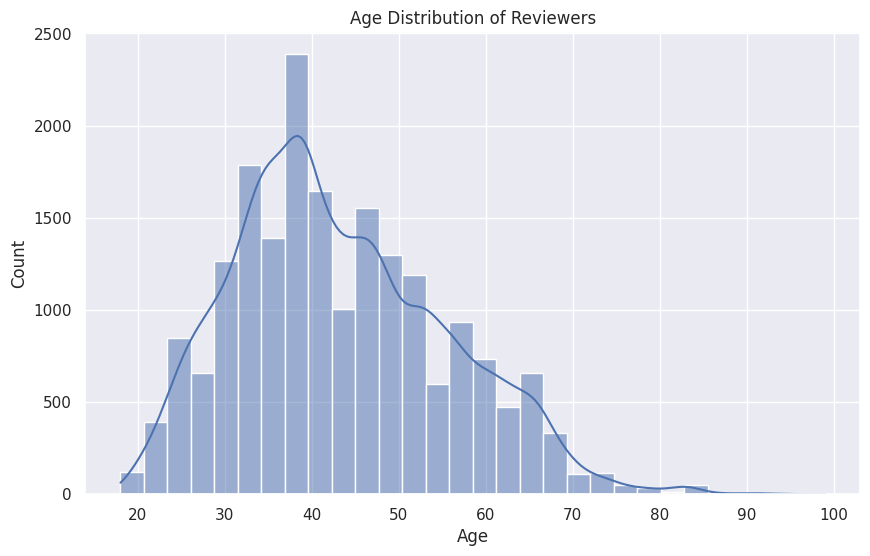

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(copied_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Reviewers')
plt.show()

<ipython-input-23-78e55f2f1c23>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=copied_data, palette='muted')


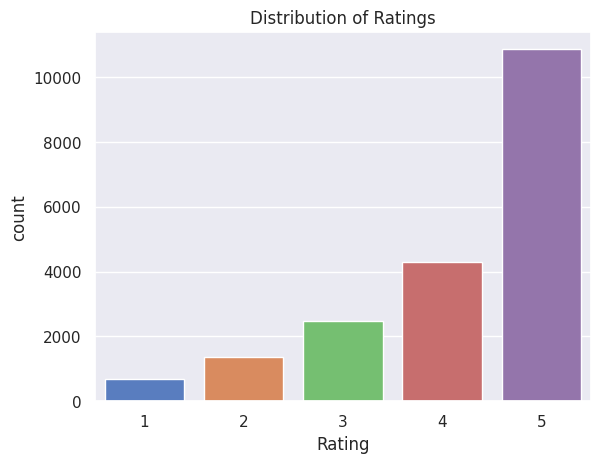

In [23]:
sns.countplot(x='Rating', data=copied_data, palette='muted')
plt.title('Distribution of Ratings')
plt.show()


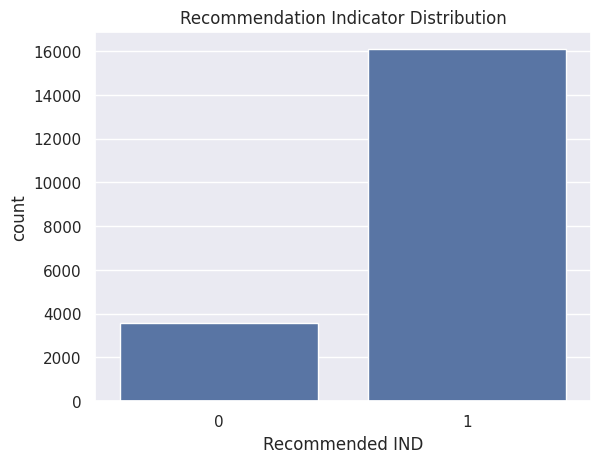

In [24]:
sns.countplot(x='Recommended IND', data=copied_data)
plt.title('Recommendation Indicator Distribution')
plt.show()


cleaning the text data

In [25]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

copied_data['Review Text'] = copied_data['Review Text'].apply(clean_text)


In [26]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

copied_data['Title'] = copied_data['Title'].apply(clean_text)


In [27]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

copied_data['Division Name'] = copied_data['Division Name'].apply(clean_text)


In [28]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

copied_data['Department Name'] = copied_data['Department Name'].apply(clean_text)


In [29]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

copied_data['Class Name'] = copied_data['Class Name'].apply(clean_text)


In [30]:
# Define regex patterns to look for emphasis and sentiment
patterns = {
    "positive_emphasis": re.compile(r'\b(love|excellent|great|amazing|perfect|recommend|satisfied|good|happy|best|beautiful|awesome)\b', re.IGNORECASE),
    "negative_emphasis": re.compile(r'\b(bad|poor|terrible|disappointed|awful|hate|worst|broken|ugly|unsatisfied|unhappy|faulty)\b', re.IGNORECASE),
}

# Initialize a dictionary to hold the counts of each pattern
pattern_counts = {key: 0 for key in patterns}

# Scan each review and count the occurrences of each pattern
for review in copied_data['Review Text']:
    for key, pattern in patterns.items():
        if re.search(pattern, review):
            pattern_counts[key] += 1

pattern_counts

{'positive_emphasis': 13498, 'negative_emphasis': 1139}

model selection process

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc


In [32]:
from sklearn.pipeline import make_pipeline

In [33]:
x = copied_data['Review Text']
y = copied_data['Rating']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Create a pipeline that first vectorizes the text data then applies the Naive Bayes classifier
model = make_pipeline(vectorizer, model)

# Train the model with the training data
model.fit(x_train, y_train)

# Predict the categories of the test data
y_pred = model.predict(x_test)
print(y_pred)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[5 5 5 ... 5 5 5]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       140
           2       0.00      0.00      0.00       297
           3       0.00      0.00      0.00       419
           4       0.14      0.00      0.00       837
           5       0.57      1.00      0.73      2240

    accuracy                           0.57      3933
   macro avg       0.14      0.20      0.15      3933
weighted avg       0.36      0.57      0.42      3933

[[   0    0    3    2  135]
 [   0    0    5    5  287]
 [   0    0    0    3  416]
 [   0    0    0    2  835]
 [   0    0    0    2 2238]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Print counts
print(copied_data['Rating'].value_counts())


Rating
5    10858
4     4289
3     2464
2     1360
1      691
Name: count, dtype: int64


In [37]:
copied_data.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

resampling the data

In [38]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority = copied_data[copied_data.Rating == 5]
minority = copied_data[copied_data.Rating < 5]

# Upsample minority class
minority_upsampled = resample(minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
copied_data = pd.concat([majority, minority_upsampled])

# Display new class counts
copied_data.Rating.value_counts()

,count
Rating,
5,10858
4,5341
3,3040
2,1626
1,851


In [39]:
print(dir())


['BernoulliNB', 'GaussianNB', 'In', 'LabelEncoder', 'MultinomialNB', 'Out', 'StandardScaler', 'TfidfVectorizer', '_', '_10', '_11', '_12', '_13', '_14', '_19', '_20', '_3', '_30', '_37', '_38', '_5', '_6', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'accuracy_score', 'auc', 'classification_report', 'clean_text', 'conf_matrix', 'confusion_matrix', 'copied_data', 'data', 'exit', 'get_ipython', 'key', 'majority', 'make_pipeline', 'minority', 'minority_upsampled', 'missing_values', 'missingvalues_percentage', 'model', 'np', 'pattern', 'pattern_counts', 'patterns', 'pd', 'plt',

this feature modeling is for the upsampled data

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Create a pipeline with SMOTE included
model_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE on the numeric data
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

x = copied_data['Review Text']
y = copied_data['Rating'] # target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(x_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.69      0.63       154
           2       0.55      0.69      0.61       328
           3       0.61      0.66      0.63       586
           4       0.58      0.63      0.60      1083
           5       0.85      0.75      0.80      2193

    accuracy                           0.70      4344
   macro avg       0.63      0.68      0.65      4344
weighted avg       0.72      0.70      0.71      4344

Confusion Matrix:
 [[ 107   28   11    3    5]
 [  23  226   53   18    8]
 [  26   70  385   75   30]
 [  11   46  103  679  244]
 [  19   41   79  402 1652]]


I have added a script that introduces feature engineering by extracting sentiment scores and text length. This information is integrated with TF-IDF vectorization for the model pipeline.

In [41]:
from textblob import TextBlob
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Define helper functions
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

def get_text_length(text):
    return len(text)

# Apply feature engineering on training and testing data
x_train_sentiment = x_train.apply(get_sentiment_score)
x_test_sentiment = x_test.apply(get_sentiment_score)

x_train_length = x_train.apply(get_text_length)
x_test_length = x_test.apply(get_text_length)

# Combine the features into DataFrames
x_train_features = pd.DataFrame({
    'text': x_train,
    'sentiment': x_train_sentiment,
    'length': x_train_length
})

x_test_features = pd.DataFrame({
    'text': x_test,
    'sentiment': x_test_sentiment,
    'length': x_test_length
})

# Define the TF-IDF vectorizer and combine features
tfidf = TfidfVectorizer(stop_words='english')
preprocessor = ColumnTransformer(transformers=[
    ('tfidf', tfidf, 'text'),
    ('sentiment', 'passthrough', ['sentiment']),
    ('length', 'passthrough', ['length'])
])

# Define the pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
model_pipeline.fit(x_train_features, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(x_test_features)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.12      0.20       154
           2       0.51      0.33      0.40       328
           3       0.48      0.51      0.49       586
           4       0.52      0.46      0.49      1083
           5       0.76      0.86      0.81      2193

    accuracy                           0.65      4344
   macro avg       0.55      0.46      0.48      4344
weighted avg       0.63      0.65      0.63      4344

Confusion Matrix:
 [[  19   41   50   25   19]
 [  10  109  122   53   34]
 [   5   38  298  148   97]
 [   2   14  114  503  450]
 [   3   12   41  243 1894]]


In the feature engineering pipeline I implemented, the length of the text and sentiment score were extracted as part of the dataset preprocessing. Here's how you can confirm and use these features:

this is for text length

In [42]:
copied_data['Review Length'] = copied_data['Review Text'].apply(lambda x: len(str(x)))
print(copied_data[['Review Text', 'Review Length']])


                                             Review Text  Review Length
3      i love love love this jumpsuit its fun flirty ...            115
4      this shirt is very flattering to all due to th...            187
6      i aded this in my basket at hte last mintue to...            472
8      i love this dress i usually get an xs but it r...            163
9      im 55 and 125 lbs i ordered the s petite to ma...            342
...                                                  ...            ...
7498   this style of shirtdress usually fits me perfe...            280
23416  on the hanger this looks like a great dress es...            288
18206  i thought it was the perfect dress by the pict...            215
19922  pros soft quality top true to size and would l...            462
7645   i recently purchased this dress and i am very ...            194

[21716 rows x 2 columns]


this is for sentiment analysis

In [47]:
copied_data['Sentiment Score'] = copied_data['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print(copied_data[['Review Text', 'Sentiment Score']])


                                             Review Text  Sentiment Score
3      i love love love this jumpsuit its fun flirty ...         0.500000
4      this shirt is very flattering to all due to th...         0.393750
6      i aded this in my basket at hte last mintue to...         0.060500
8      i love this dress i usually get an xs but it r...         0.002500
9      im 55 and 125 lbs i ordered the s petite to ma...         0.204200
...                                                  ...              ...
7498   this style of shirtdress usually fits me perfe...         0.158929
23416  on the hanger this looks like a great dress es...         0.160000
18206  i thought it was the perfect dress by the pict...         0.525000
19922  pros soft quality top true to size and would l...         0.217949
7645   i recently purchased this dress and i am very ...         0.301786

[21716 rows x 2 columns]


In [44]:
copied_data

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length,Sentiment Score
3,50,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,0,general petite,bottoms,pants,115,0.500000
4,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,6,general,tops,blouses,187,0.393750
6,39,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,general petite,tops,knits,472,0.060500
8,24,flattering,i love this dress i usually get an xs but it r...,5,1,0,general,dresses,dresses,163,0.002500
9,34,such a fun dress,im 55 and 125 lbs i ordered the s petite to ma...,5,1,0,general,dresses,dresses,342,0.204200
...,...,...,...,...,...,...,...,...,...,...,...
7498,25,poor fit,this style of shirtdress usually fits me perfe...,3,0,6,general,dresses,dresses,280,0.158929
23416,40,great swing dress but not for me,on the hanger this looks like a great dress es...,4,1,0,general petite,dresses,dresses,288,0.160000
18206,30,muumuu,i thought it was the perfect dress by the pict...,3,0,1,general,dresses,dresses,215,0.525000
19922,37,cute off the shoulders meh in reality,pros soft quality top true to size and would l...,3,0,0,general,tops,knits,462,0.217949


In [45]:
print(copied_data.loc[3, 'Review Text'])

i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments


classification task:
this is to seperate the data and classify them as positive or negative reviews

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


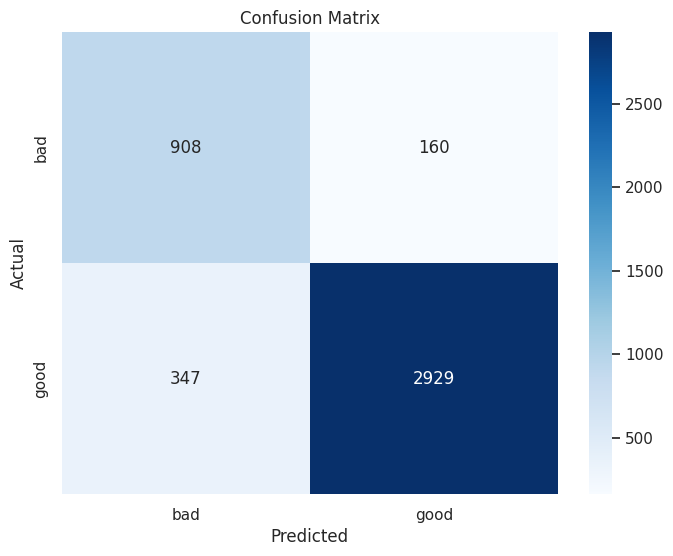

              precision    recall  f1-score      support
bad            0.723506  0.850187  0.781748  1068.000000
good           0.948203  0.894078  0.920346  3276.000000
accuracy       0.883287  0.883287  0.883287     0.883287
macro avg      0.835855  0.872133  0.851047  4344.000000
weighted avg   0.892960  0.883287  0.886270  4344.000000


In [46]:
# Convert 'Rating' column to numeric
copied_data['Rating'] = pd.to_numeric(copied_data['Rating'], errors='coerce')

# Define a function to convert ratings into 'good' and 'bad'
def binary_rating(rating):
    if rating >= 4:
        return 'good'
    else:
        return 'bad'

# Apply the function to create a binary target variable
binary_data = copied_data.copy()
binary_data['Binary Rating'] = binary_data['Rating'].apply(binary_rating)

# Ensure there are no missing or invalid values in 'Review Text' and 'Binary Rating'
binary_data = binary_data.dropna(subset=['Review Text', 'Binary Rating'])

# Features and target variable
x_binary = binary_data['Review Text']
y_binary = binary_data['Binary Rating']

# Train-test split
x_train_binary, x_test_binary, y_train_binary, y_test_binary = train_test_split(
    x_binary, y_binary, test_size=0.2, random_state=42
)

# Define the pipeline with SMOTE and Logistic Regression
model_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the pipeline
model_pipeline.fit(x_train_binary, y_train_binary)

# Make predictions
y_pred_binary = model_pipeline.predict(x_test_binary)

# Classification report and confusion matrix
binary_report = classification_report(y_test_binary, y_pred_binary, output_dict=True)
binary_conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Convert classification report to a DataFrame for better visualization
binary_report_df = pd.DataFrame(binary_report).transpose()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(binary_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print(binary_report_df)



showing the rating scores (accuracy scores are not 100%)

In [49]:

# Calculate sentiment polarity score for each review
binary_data['Sentiment Score'] = binary_data['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define a function to classify sentiment into star ratings
def sentiment_to_star(score):
    """
    Converts sentiment score to star rating:
    - Score <= -0.6 -> 1 star
    - Score <= -0.2 -> 2 stars
    - Score <= 0.2  -> 3 stars
    - Score <= 0.6  -> 4 stars
    - Score >  0.6  -> 5 stars
    """
    if score <= -0.6:
        return 1
    elif score <= -0.2:
        return 2
    elif score <= 0.2:
        return 3
    elif score <= 0.6:
        return 4
    else:
        return 5

# Apply the function to map sentiment scores to star ratings
binary_data['Predicted Star Rating'] = binary_data['Sentiment Score'].apply(sentiment_to_star)

# Display the review text, sentiment score, and predicted star rating
print(binary_data[['Review Text', 'Sentiment Score', 'Predicted Star Rating']])


                                             Review Text  Sentiment Score  \
3      i love love love this jumpsuit its fun flirty ...         0.500000   
4      this shirt is very flattering to all due to th...         0.393750   
6      i aded this in my basket at hte last mintue to...         0.060500   
8      i love this dress i usually get an xs but it r...         0.002500   
9      im 55 and 125 lbs i ordered the s petite to ma...         0.204200   
...                                                  ...              ...   
7498   this style of shirtdress usually fits me perfe...         0.158929   
23416  on the hanger this looks like a great dress es...         0.160000   
18206  i thought it was the perfect dress by the pict...         0.525000   
19922  pros soft quality top true to size and would l...         0.217949   
7645   i recently purchased this dress and i am very ...         0.301786   

       Predicted Star Rating  
3                          4  
4            